LHW7

In [9]:
using MatrixMarket, LinearAlgebra
pwd()
As = mmread("C:\\Users\\AllanStruthers\\Desktop\\Numerical-Linear-Algebra\\bcsstk01.mtx")

48×48 SparseArrays.SparseMatrixCSC{Float64, Int64} with 400 stored entries:
⢑⣴⠝⢑⢔⠁⠀⠀⠀⠑⢄⠔⠑⣤⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀
⢗⢁⠕⢅⢀⢵⢄⠀⢀⠐⠁⠑⠂⠀⠑⢄⠀⠠⠀⠀⠀⠀⠀⠀
⠔⠑⢄⣔⠟⢅⢀⠕⢅⠀⠀⠀⠀⠀⠀⡀⠛⢄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠑⢄⠔⢱⣶⠝⢑⢔⠁⠀⠀⠀⠀⠀⠀⠑⣤⠈⢱⣶⠉
⢄⠀⢀⠐⠁⠑⢗⢁⠟⢅⢀⢵⠀⠀⠀⠀⠀⠀⠂⠀⠑⢇⠀⠻
⢀⠕⢅⠀⠀⠀⠔⠑⢄⣔⠟⢅⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠛⢄
⠑⣤⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⢑⣴⠉⢑⢔⠁⠀⠀⠀⠀⠀⠀
⠂⠀⠑⢄⠀⠠⠀⠀⠀⠀⠀⠀⢇⢀⠕⢅⢀⢵⢄⠀⢀⠀⠀⠀
⠀⠀⠀⡀⠛⢄⠀⠀⠀⠀⠀⠀⠔⠑⢄⣔⠟⢅⢀⠕⢅⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠑⣤⠈⠀⠀⠀⠀⠀⠀⠑⢄⠔⢑⣴⠝⢑⢔⠁
⠀⠀⠀⠀⠀⠀⢆⣀⠵⢄⠀⠠⠀⠀⠀⠐⠁⠑⢗⢁⠕⢅⣀⠵
⠀⠀⠀⠀⠀⠀⡜⠛⣤⡀⠛⢄⠀⠀⠀⠀⠀⠀⠔⠑⢄⡜⠛⣤

Output from spare and dens matrices is different. Different algorithms! As is sparse A is the dense equivalent!

## Dense "Tuple"

In [30]:
A = Matrix(As)[:,1:12]
(QFat,R) = qr(A)
Q=Matrix(QFat)
println(size(Q), "\t",  size(QFat), "\t", size(R))
println(norm(QFat'*QFat - I), "\t",  norm(A-QFat*R), "\t",norm(A-QFat*R)/norm(A))
println(norm(Q'*Q - I), "\t",  norm(A-Q*R), "\t",norm(A-Q*R)/norm(A))

(48, 12)	(48, 48)	(12, 12)
1.7584163179301218e-15	9.249362348455485e-7	2.846485958017946e-16
1.1814589043473524e-15	9.13668468662859e-7	2.8118094722139153e-16


We have thick and thin QR decompositions.  The silent columns of Q i.e. 13:48 provide a basis for the stuff perpendicular to the columns of Q. 

## Dense "Structure"

In [75]:
A = Matrix(As)[:,1:12]
F = qr(A)
QFat = F.Q
R = F.R
Q= Matrix(QFat)
println(size(Q), "\t",  size(QFat), "\t", size(R))
println(norm(QFat'*QFat - I), "\t",  norm(A-QFat*R), "\t",norm(A-QFat*R)/norm(A))
println(norm(Q'*Q - I), "\t",  norm(A-Q*R), "\t",norm(A-Q*R)/norm(A))

(48, 12)	(48, 48)	(12, 12)
1.7584163179301218e-15	9.249362348455485e-7	2.846485958017946e-16
1.1814589043473524e-15	9.13668468662859e-7	2.8118094722139153e-16


Sparse does a different algorithm which returns more "bits".  These bits tell you how it moved columns and rows around! If you use the structure it will work very similarly.  You just need to move the rows and columns around. 

## Sparse: "Structure" pivoting

In [77]:
A = As[:,1:12]
F = qr(A)
R=F.R
Q=Matrix(F.Q)
pr=F.prow
pc=F.pcol
norm(A[pr,pc]-Q*R)/norm(A)

5.559729893037616e-16

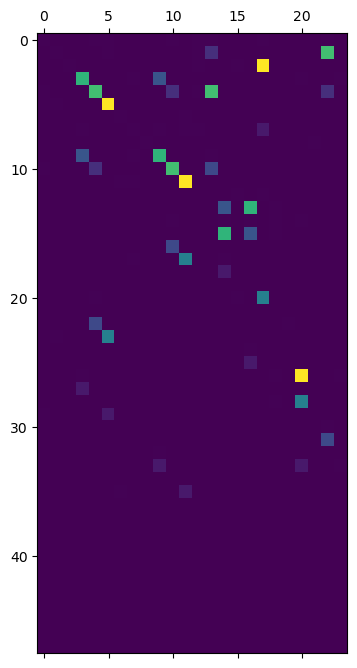

PyObject <matplotlib.image.AxesImage object at 0x000000007D416F70>

In [82]:
using PyPlot
matshow([A A[pr,pc]] )